In [52]:
import ipywidgets as wg
print(f'IPywidgets version: {wg.__version__}')

import numpy as np
print(f'NumPy version: {np.__version__}')

import matplotlib.pyplot as plt
import matplotlib
print(f'Matplotlib version: {matplotlib.__version__}')

import pandas as pd
print(f'Pandas version: {pd.__version__}')

import scipy as sp
print(f'Scipy version: {sp.__version__}')

IPywidgets version: 7.5.1
NumPy version: 1.19.2
Matplotlib version: 3.3.4
Pandas version: 1.2.3
Scipy version: 1.6.1


# Problema 1

In [4]:
def f(x: float) -> float:
    return 2 * x ** 3 + 5 * x ** 2 + 3 * x + 4

def f_derivative(x: float) -> float:
    return 6 * x ** 2 + 10 * x + 3

def gradient_descent(x: float, alpha: float, iterations: int) -> None:
    old_x: float = 0
    mins: float = []
    for i in range(0, iterations):
        old_x = x 
        gradient: float = np.clip(f_derivative(old_x), -50, 50)
        move: float = gradient * alpha
        x = old_x - move
        mins.append(f(x))
        
    plt.grid(axis='both')
    plt.plot(mins,'.b')
    plt.xlabel('iterations')
    plt.ylabel('mins values in function')
    plt.show()
    
wg.interact(gradient_descent, x = (0,50), alpha = (0.01,0.05,0.01), iterations = (10,100))

interactive(children=(IntSlider(value=25, description='x', max=50), FloatSlider(value=0.02, description='alpha…

<function __main__.gradient_descent(x: float, alpha: float, iterations: int) -> None>

# Problema 2

In [5]:
def f(x: int, a: int, b: int) -> int:
    return a * x + b
def vertical_distance(x: int, y: int, a: int, b: int) -> int:
    return abs(y - f(x, a, b))
def function(a: int, b: int) -> None:
    x_axis: np.ndarray = np.random.uniform(-20, 10, 100)
    y_axis: np.ndarray = np.random.uniform(-20, 10, 100)
    x_range: np.ndarray = np.linspace(-20, 10, 2)
    distances: list = [vertical_distance(x_axis[index], y_axis[index], a, b) for index in range(100)]
    plt.plot(x_range, f(x_range, a, b), x_axis, y_axis, '.r')
    plt.show()
    plt.hist(distances,len(distances))
    mse: list = [y_axis[index] - (a * x_axis[index] + b) ** 2 for index in range(100)] 
    print(1 / 100 * sum(mse));
wg.interact(function, a = (1,50), b = (-100, 100))

interactive(children=(IntSlider(value=25, description='a', max=50, min=1), IntSlider(value=0, description='b',…

<function __main__.function(a: int, b: int) -> None>

# Problema 3

In [6]:
table: pd.core.frame.DataFrame = pd.read_csv('iris.data', header = None)
    
def show_clolumn(choice1: int, choice2: int):
    print(table[[choice1, choice2]])

choices: list = [("Min", 0), ("Max", 1), ("Mean", 2),("SD", 3), ("Class Correlation", 4)]

wg.interact(show_clolumn, choice1 = choices, choice2 = choices)

interactive(children=(Dropdown(description='choice1', options=(('Min', 0), ('Max', 1), ('Mean', 2), ('SD', 3),…

<function __main__.show_clolumn(choice1: int, choice2: int)>

# Problema 4

In [62]:
def f(x: float):
    return 2 * x ** 2 - 5 * x + 3 + np.random.uniform(0, 50)

def generate(n: int, method: int):
    x_axis = np.random.uniform(0, 50, n)
    y_axis = f(x_axis)
    
    x = np.linspace(min(x_axis), max(x_axis), num=n)
    y = krogh_interpolate(x_axis, y_axis, x)
    
    plt.plot(x_axis, y_axis, "o", label="observation")
    plt.plot(x, y, label="krogh interpolation")
    
#     if method == 1:
#         print()
#     elif method == 2:
        
#     elif method == 3:
        
#     elif method == 4:
        
#     else:
    
#     plt.grid(axis = 'both')
#     plt.plot(x_axis, y_axis,'.b')
#     plt.plot(sp.interpolate.KroghInterpolator(x_axis, y_axis),'.r')
#     plt.show()
    
wg.interact(generate, n = (1, 100), method = [("met1", 0), ("met2", 1), ("met3", 2),("met4", 3), ("met5", 4)])

interactive(children=(IntSlider(value=50, description='n', min=1), Dropdown(description='method', options=(('m…

<function __main__.generate(n: int, method: int)>

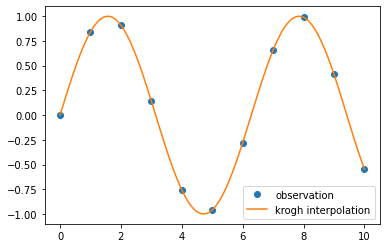

In [59]:
import matplotlib.pyplot as plt
from scipy.interpolate import krogh_interpolate
x_observed = np.linspace(0.0, 10.0, 11)
y_observed = np.sin(x_observed)
x = np.linspace(min(x_observed), max(x_observed), num=100)
y = krogh_interpolate(x_observed, y_observed, x)
plt.plot(x_observed, y_observed, "o", label="observation")
plt.plot(x, y, label="krogh interpolation")
plt.legend()
plt.show()